In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
columns = ['size_in_ft2','rooms','price']
df = pd.read_csv('housePrice.txt', names=columns)
df.head(10)


,size_in_ft2,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


#### Ploting size vs price of the actual data

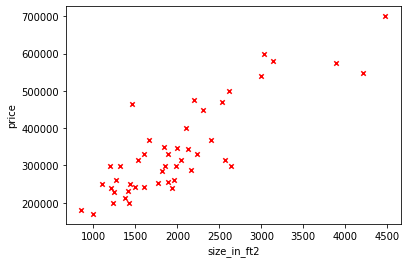

In [32]:
df.plot(kind='scatter', x='size_in_ft2',y='price', marker='x', c='red')
plt.show()

### dividing the dataset into two parts
* first 70% is for training 
* remaining 30% is for testing

In [31]:
x_train = np.array(df.size_in_ft2[: round(len(df.size_in_ft2)*0.7)]/4478)
y_train = np.array(df.price[: round(len(df.price)*0.7)])

x_test = np.array(df.size_in_ft2[round(len(df.size_in_ft2)*0.7) : ]/4478)
y_test = np.array(df.price[round(len(df.price)*0.7) : ])



## Defining hypothesis for data
* yPredicted = h(x) = m0 + m1x
* here x is size and y is price
* we will randomly choose m0 and m1 initially
* here I have normalized x values, otherwise the cost never minimizes i.e convergence is not happening
### I have plotted the predicted line (Blue line at the bottom of the figure), it's nowhere near our data points now

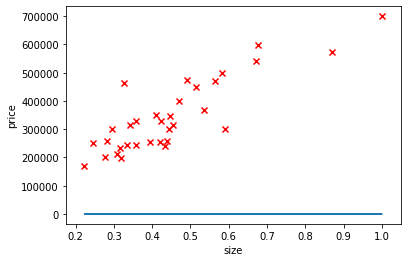

In [12]:
m0 = 1
m1 = 2

# normalizing x values for easier convergence

yPredicted = np.array([m0*i + m1 for i in x_train])

plt.scatter(x_train,y_train, marker='x', c='red')
plt.plot(x_train, yPredicted)
plt.xlabel('size')
plt.ylabel('price')
plt.show()

## Gradient descent for optimizing the cost 
* This will update m0 and m1 values to minimize cost at each iteration


In [13]:
loss = []
iteration = 2000
def gradient_descent(x , y, iteration):
    learning_rate = 0.1
    m0 = 1
    m1 = 2

    for i in range(iteration):
        yPredicted = m0  + (m1*x)
        cost = (1 / (2 * len(y))) * sum([i**2 for i in (yPredicted - y)])
        temp0 = m0 - ((1 / len(y)) * learning_rate * sum(yPredicted - y))
        temp1 = m1 - ((1 / len(y)) * learning_rate * sum((yPredicted - y) * x))
        m0 = temp0
        m1 = temp1
        loss.append(cost)
    return yPredicted , m0, m1

### This is what out  line looks like after applying Gradient Descent

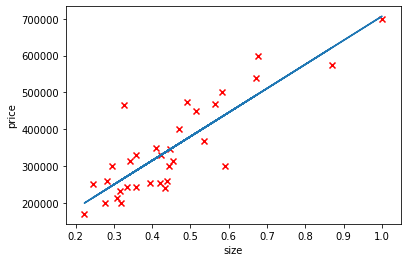

In [14]:
yPredicted, m0, m1 = gradient_descent(x_train, y_train, iteration)
plt.scatter(x_train,y_train, marker='x', c='red')
plt.plot(x_train, yPredicted)
plt.xlabel('size')
plt.ylabel('price')
plt.show()


### updated values of m0 and m1 after applying Gradient Descent

In [15]:
print(f'm0 = {m0}   m1 = {m1}')

m0 = 53601.54197590573   m1 = 653232.422800601


### Cost vs Iteration
* shows how cost is minimizing with number of iterations

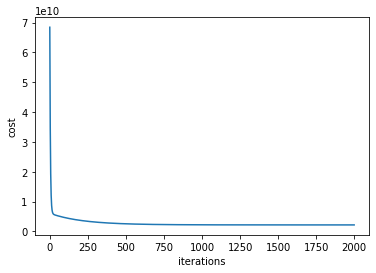

In [16]:
plt.plot(range(iteration), loss)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

### Testing our model with test dataset
* blue ones are actual price and red crosses are predicted price

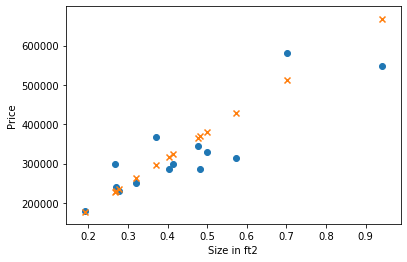

In [33]:
yPredicted = m0 + m1*x_test
plt.scatter(x_test, y_test)
plt.scatter(x_test,yPredicted, marker='x')
plt.xlabel('Size in ft2')
plt.ylabel('Price')
plt.show()
   

### Comparison of Predicted Price and Actual Price

In [37]:
print(f'Predicted Price  Actual Price')
for i in range(len(x_test)):
    print(f'{np.round(yPredicted[i])} \t {y_test[i]}')

Predicted Price  Actual Price
511214.0 	 579900
317783.0 	 285900
263225.0 	 249900
234342.0 	 229900
364609.0 	 345000
668469.0 	 549000
368985.0 	 287000
296339.0 	 368500
380072.0 	 329900
428065.0 	 314000
228653.0 	 299000
177888.0 	 179900
323764.0 	 299900
229090.0 	 239500
